In [22]:
import os
import sys

import numpy as np
import h5py
import matplotlib.pyplot as plt
from skimage import io, transform
from rich.progress import track
from pystackreg import StackReg
import imageio

sys.path.insert(0, "D:/Research/scripts/paraview_analysis/")
import support as sp
import gif

folder = "D:/Research/Ta_AM-Spalled/Data/3D/"


In [2]:
bse_folder = os.path.join(folder, "BSE/")
key_f = lambda x: int(x.replace(".tif", "").replace("Slice", "").replace(bse_folder, ""))
bse_paths = os.listdir(bse_folder)
paths = sorted([os.path.join(bse_folder, path) for path in bse_paths if ".tif" in path], key=key_f)
# bse = np.array([io.imread(path, as_gray=True) for path in paths])
bse = io.imread(paths[0], as_gray=True)
dy = 4050
dx = 4212
slice_y = slice(int(bse.shape[0] / 2 - dy / 2) - 23, int(bse.shape[0] / 2 + dy / 2) - 23)
slice_x = slice(int(bse.shape[1] / 2 - dx / 2) + 100, int(bse.shape[1] / 2 + dx / 2) + 100)


In [6]:
im0 = io.imread(paths[211])
im = io.imread(paths[212])

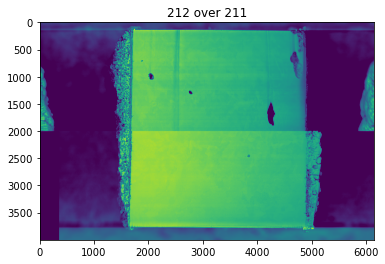

In [30]:
s = 355
im1 = np.zeros(im.shape, im.dtype)
im1[:, s:] = im[:, :-s]
IM = np.vstack((im0[:2000, :], im1[2000:4000, :]))
plt.close("all")
plt.imshow(IM)
# plt.imshow(im0[:1000, :2000])
# plt.imshow(im1[:500, :2000], cmap="bone")
plt.title(f"{212} over {211}")
plt.show()

In [31]:
for i in range(len(paths)):
    im = io.imread(paths[i], as_gray=True)
    if i+1 > 212:
        out = np.zeros(im.shape, dtype=im.dtype)
        out[:, 355:] = im[:, :-355]
    else:
        out = im
    imageio.imsave(f"D:/Research/Ta_AM-Spalled/Data/3D/BSE/cropped/{i+1}.tiff", out[slice_y, slice_x])